In [1]:
import sys
import pandas as pd
sys.path.append('/Users/Pradap/Documents/Research/Python-Package/enrique/')

In [2]:
import magellan as mg
mg.init_jvm()

True

In [3]:
wal = mg.read_csv('../magellan/datasets/books/walmart.csv',
                  dtype={'isbn': pd.np.str, 'pages': pd.np.str, 'volume': pd.np.str, 'editionNum': pd.np.str},
                  low_memory=False, key='id')

bwk = mg.read_csv('../magellan/datasets/books/bowker.csv',
                  dtype={'isbn': pd.np.str, 'pages': pd.np.str, 'volume': pd.np.str, 'editionNum': pd.np.str},
                  low_memory=False, key='id')

In [4]:
ab = mg.AttrEquivalenceBlocker()
candset = ab.block_tables(bwk, wal, 'isbn', 'isbn', ['title', 'author'], ['title', 'author'])

feat_table = mg.get_features_for_blocking(bwk, wal)

sample_cset = mg.sample_one_table(candset, 30)


In [5]:
#label_cset = mg.label(sample_cset, 'gold_label')

In [6]:
#label_cset.save_table('book_label.pkl')

In [7]:
label_cset = mg.load_table('book_label.pkl')
label_cset.set_property('ltable', bwk)
label_cset.set_property('rtable', wal)


In [8]:
fv = mg.extract_feat_vecs(label_cset, feat_table=feat_table, attrs_after=['gold_label'])

dt = mg.DTMatcher(random_state=81)
dt.fit(table=fv, exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold_label'], target_attr='gold_label')

In [9]:
mg.visualize_tree(dt, fv.columns, ['_id', 'ltable.id', 'rtable.id', 'gold_label'])

Execute the following command in IPython command prompt:

from IPython.display import Image
Image(filename='dt_.png') 


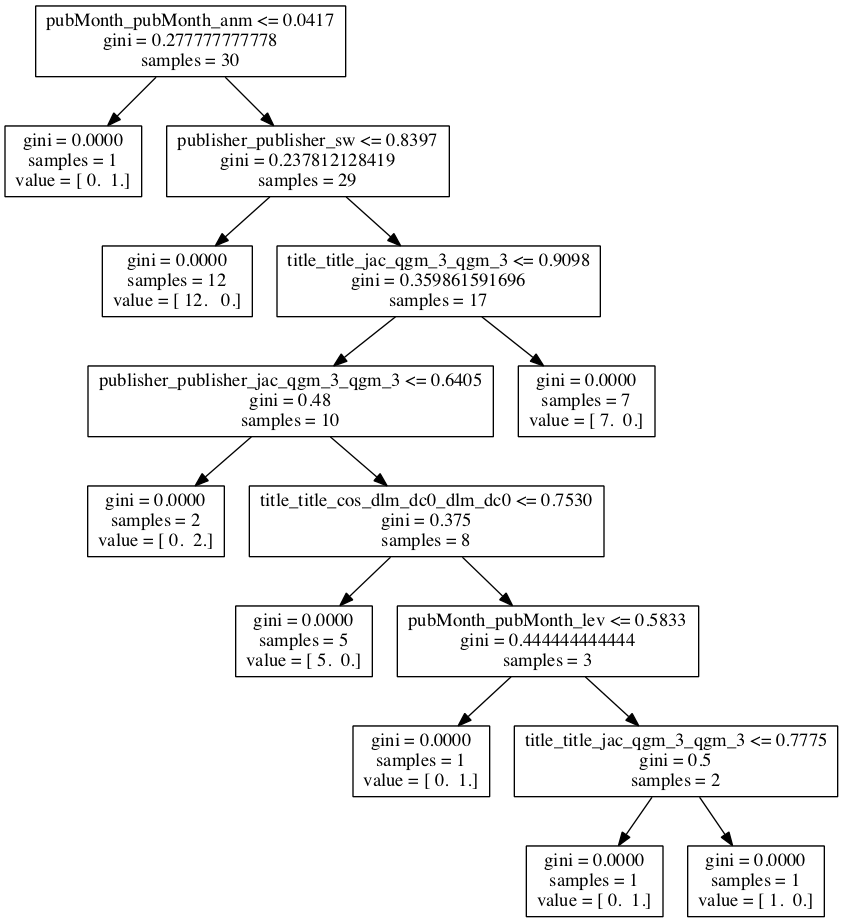

In [10]:
from IPython.display import Image
Image(filename='dt_.png')

In [11]:
mg.debug_dt(dt, bwk.ix[2], wal.ix[1], feat_table, fv.columns, ['_id', 'ltable.id', 'rtable.id', 'gold_label'])

Condition pubMonth_pubMonth_anm <= 0.0416666679084 FAILED (  value : 0.0909090909091)
    Condition publisher_publisher_sw <= 0.839743614197 PASSED (  value : 0.222222223878)
Tuples match status : False


In [12]:
bwk.ix[2]

id               9780000773920
title                   Cywiro
author              Cymru, Meu
numAuthors                   1
binding         CD/Spoken Word
publisher            Zondervan
isbn             9780000773920
pubYear                   2005
pubMonth                     1
pubDay                     NaN
editionNum                 NaN
pages                      NaN
volume                     NaN
lang                       ENG
editionDescr               NaN
series                     NaN
upc                        NaN
Name: 2, dtype: object

In [13]:
wal.ix[1]

id                                             3659464
title           Software Engineering Quality Practices
author                              Kandt, Ronald Kirk
numAuthors                                           1
binding                                      Hardcover
publisher                        Auerbach Publications
isbn                                     9780849346330
pubYear                                           2005
pubMonth                                            11
pubDay                                               1
editionNum                                         NaN
pages                                              256
volume                                             NaN
lang                                               ENG
editionDescr                                       NaN
category               Books/ARCHIVE/Books Misc  Books
upc11                          97808493463 78084934633
upc12                        780849346330 978084934633
upc13     